<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0.-Loading-the-data" data-toc-modified-id="0.-Loading-the-data-1">0. Loading the data</a></span></li><li><span><a href="#1.-RANDOMLY-Generate-labels" data-toc-modified-id="1.-RANDOMLY-Generate-labels-2">1. RANDOMLY Generate labels</a></span></li><li><span><a href="#2.-Data-cleaning" data-toc-modified-id="2.-Data-cleaning-3">2. Data cleaning</a></span></li><li><span><a href="#3.-Feature-engineering-(n-grams)" data-toc-modified-id="3.-Feature-engineering-(n-grams)-4">3. Feature engineering (n-grams)</a></span></li><li><span><a href="#4.-Vectorize-the-features" data-toc-modified-id="4.-Vectorize-the-features-5">4. Vectorize the features</a></span></li><li><span><a href="#5.-Training-the-model" data-toc-modified-id="5.-Training-the-model-6">5. Training the model</a></span></li><li><span><a href="#6.-Quick-evaluation" data-toc-modified-id="6.-Quick-evaluation-7">6. Quick evaluation</a></span></li><li><span><a href="#7.-Plotting-the-result" data-toc-modified-id="7.-Plotting-the-result-8">7. Plotting the result</a></span></li></ul></div>

**I use SVM (sometimes logistic regression, Naive Bayes or SGD in scikit-learn) as a quick classification 
before using deep learning libraries.**

## 0. Loading the data

In [1]:
# open the file and read the CNN-dm data (originally for summarization tasks)
source_lines = open('/Users/taolin/Desktop/udacity/data/train.txt.src' , encoding='utf-8').\
read().strip().split('\n')
source_lines = source_lines
target_lines = open('/Users/taolin/Desktop/udacity/data/train.txt.tgt.tagged' , encoding='utf-8').\
read().replace("</t>",'').replace("<t>",'').strip('').split('\n')
target_lines = target_lines

In [2]:
sample_data = target_lines[0:1000]
print("The raw input: \n\n" + sample_data[45])

The raw input: 

 orme , tennessee , has running water from 6 p.m. to 9 p.m.   town 's spring ran dry in midst of southeast drought .   donated water is trucked in from alabama .   completion of pipeline will solve problem for good . 


## 1. RANDOMLY Generate labels

In [3]:
# randomly generate 1000 labels
import random

labels = [random.randint(0,2) for i in range(0,len(sample_data))]

## 2. Data cleaning

In [4]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','please','fw','fwd','user','issue'])
stop_words.extend(["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder","a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount", "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as", "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the","a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p",
"q", "r", "s", "t", "u", "v", "w", "x", "y", "z","A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",'co','op','research-articl', 'pagecount','cit','ibid','les','le','au','que','est','pas','vol','el','los','pp','u201d','well-b', 'http', 'volumtype', 'par', '0o', '0s', '3a', '3b', '3d', '6b', '6o', 'a1', 'a2', 'a3', 'a4', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'aj', 'al', 'an', 'ao', 'ap', 'ar', 'av', 'aw', 'ax', 'ay', 'az', 'b1', 'b2', 'b3', 'ba', 'bc', 'bd', 'be', 'bi', 'bj', 'bk', 'bl', 'bn', 'bp', 'br', 'bs', 'bt', 'bu', 'bx', 'c1', 'c2', 'c3', 'cc', 'cd', 'ce', 'cf', 'cg', 'ch', 'ci', 'cj', 'cl', 'cm', 'cn', 'cp', 'cq', 'cr', 'cs', 'ct', 'cu', 'cv', 'cx', 'cy', 'cz', 'd2', 'da', 'dc', 'dd', 'de', 'df', 'di', 'dj', 'dk', 'dl', 'do', 'dp', 'dr', 'ds', 'dt', 'du', 'dx', 'dy', 'e2', 'e3', 'ea', 'ec', 'ed', 'ee', 'ef', 'ei', 'ej', 'el', 'em', 'en', 'eo', 'ep', 'eq', 'er', 'es', 'et', 'eu', 'ev', 'ex', 'ey', 'f2', 'fa', 'fc', 'ff', 'fi', 'fj', 'fl', 'fn', 'fo', 'fr', 'fs', 'ft', 'fu', 'fy', 'ga', 'ge', 'gi', 'gj', 'gl', 'go', 'gr', 'gs', 'gy', 'h2', 'h3', 'hh', 'hi', 'hj', 'ho', 'hr', 'hs', 'hu', 'hy', 'i', 'i2', 'i3', 'i4', 'i6', 'i7', 'i8', 'ia', 'ib', 'ic', 'ie', 'ig', 'ih', 'ii', 'ij', 'il', 'in', 'io', 'ip', 'iq', 'ir', 'iv', 'ix', 'iy', 'iz', 'jj', 'jr', 'js', 'jt', 'ju', 'ke', 'kg', 'kj', 'km', 'ko', 'l2', 'la', 'lb', 'lc', 'lf', 'lj', 'ln', 'lo', 'lr', 'ls', 'lt', 'm2', 'ml', 'mn', 'mo', 'ms', 'mt', 'mu', 'n2', 'nc', 'nd', 'ne', 'ng', 'ni', 'nj', 'nl', 'nn', 'nr', 'ns', 'nt', 'ny', 'oa', 'ob', 'oc', 'od', 'of', 'og', 'oi', 'oj', 'ol', 'om', 'on', 'oo', 'oq', 'or', 'os', 'ot', 'ou', 'ow', 'ox', 'oz', 'p1', 'p2', 'p3', 'pc', 'pd', 'pe', 'pf', 'ph', 'pi', 'pj', 'pk', 'pl', 'pm', 'pn', 'po', 'pq', 'pr', 'ps', 'pt', 'pu', 'py', 'qj', 'qu', 'r2', 'ra', 'rc', 'rd', 'rf', 'rh', 'ri', 'rj', 'rl', 'rm', 'rn', 'ro', 'rq', 'rr', 'rs', 'rt', 'ru', 'rv', 'ry', 's2', 'sa', 'sc', 'sd', 'se', 'sf', 'si', 'sj', 'sl', 'sm', 'sn', 'sp', 'sq', 'sr', 'ss', 'st', 'sy', 'sz', 't1', 't2', 't3', 'tb', 'tc', 'td', 'te', 'tf', 'th', 'ti', 'tj', 'tl', 'tm', 'tn', 'tp', 'tq', 'tr', 'ts', 'tt', 'tv', 'tx', 'ue', 'ui', 'uj', 'uk', 'um', 'un', 'uo', 'ur', 'ut', 'va', 'wa', 'vd', 'wi', 'vj', 'vo', 'wo', 'vq', 'vt', 'vu', 'x1', 'x2', 'x3', 'xf', 'xi', 'xj', 'xk', 'xl', 'xn', 'xo', 'xs', 'xt', 'xv', 'xx', 'y2', 'yj', 'yl', 'yr', 'ys', 'yt', 'zi', 'zz'])

import re

# data cleaning from Part 1
def data_list(data,stop):
    
    #from nltk.stem.lancaster import LancasterStemmer
    #st = LancasterStemmer()
    
    new_data = []
    for item in data:
        
        #if type(item)== str: doc = nlp(item)
        # document level language detection. Think of it like average language of document!
        #lang = doc._.language['language']
        #print(lang)
        
        #if (type(item) == str) and (lang =="en"):
        if (type(item) == str):
            #print(item)
            #print("\n")
    
    # delete some expressions
            if "== Created by": pass
    
    # delete weblinks
            item = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"",item)
    #lower case
            item = item.lower()
    
    # remove newlines
            item = re.sub(r'\r\n\r\n\r\n\r\n', '. ', item)

    # remove emails
            item = re.sub('\S*@\S*\s?', '', item)
        
    # remove <...> and {...}
            item = re.sub('<.*?>','',item)
            item = re.sub('{.*?}','',item)

    # remove all numbers; puntuations
            item = re.sub(r'\d+', '',item)
            item = re.sub(r'\+', '',item)
            item = re.sub(r'\|',"",item)
            #item = re.sub(r'==','',item)
            #item = re.sub(r'\*','',item)
            #item = re.sub(r'\_','',item)
            item = re.sub(r'[^\w\s]', '', item)
    
    # remove specific words or phrases
            item = re.sub('hi team',"",item)
            item = re.sub("hey","",item)
            item = re.sub("hi","",item)
            item = re.sub("hi there","",item)
            
            #print(item)
            
            w_list = item.split()
            #print(w_list)
            w = []  
            for word in w_list:
                if word not in stop:
                    w.append(word)
            new_data.append(w)
        
    return(new_data)   

In [5]:
t = data_list(sample_data, stop_words)

## 3. Feature engineering (n-grams)

In [6]:
import nltk
from nltk.util import ngrams

# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

def n_gram_data(data):
    n_Gram = []
    for w_list in data:
        string = " ".join(w_list)
        ngram_list1 = extract_ngrams(string, 1)#uni
        ngram_list2 = extract_ngrams(string, 2)#bi
        ngram = ngram_list1 + ngram_list2
        n_Gram.append(ngram)
    return n_Gram

def text_label(data,label):##[[['a','au'],1],...]
    new = []
    for i in range(0,len(data)):
        token = [data[i],label[i]]
        new.append(token)
    return new

d1 = n_gram_data(t)
d1_pair = text_label(d1,labels)

## 4. Vectorize the features

In [7]:
# calculate all possible number of features for one-hots
import numpy as np
def Fea(data):
    feature = []
    for item in data:
        feature += item
    feature=list(set(feature))
    return feature

# vectorize the data #[[['a','au'],1],...]-->[(1,array([0,0,0,1]),...]
def vectorize(data,feature,num):#[[['a','au'],1],...]-->[(1,array([0,0,0,1]),...]    
    vectorized=[]
    for d in data:
        vec=[0]*num+[1]#add bias at end     
        for f in d[0]:
            if f in feature:
                vec[feature.index(f)]+=1
        vectorized.append((d[1],np.array(vec)))
    return vectorized

feature1=Fea(d1)
new_arr1=vectorize(d1_pair,feature1,len(feature1))

In [8]:
print (f"The number of features is {len(feature1)}")

The number of features is 27275


In [9]:
#split the data
data=[element[1] for element in new_arr1]
data_labels=np.asarray([int(element[0]) for element in new_arr1])

## 5. Training the model

In [10]:
# PCA + SVM
from sklearn import svm
from sklearn.decomposition import PCA
#from sklearn import cross_validation
#from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, data_labels, test_size=0.2, random_state=0)
pca = PCA(n_components=128)# adjust for yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
clf = svm.SVC(C=12,gamma="auto",class_weight='balanced', decision_function_shape='ovr')
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
gold = Y_test 

## 6. Quick evaluation

In [11]:
from sklearn.metrics import recall_score, f1_score, precision_score
#p=precision_score(Y_test, pred)
p=precision_score(Y_test, pred,average="weighted")
f=f1_score(Y_test, pred,pred,average="weighted")
r=recall_score(Y_test, pred,average="weighted")
print("precision is " +str(p)+"\n") 
print("recall is " +str(r))
print("f1 is " +str(f)+"\n")

precision is 0.140625

recall is 0.375
f1 is 0.5454545454545453



/Users/taolin/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/taolin/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


## 7. Plotting the result

<Figure size 432x288 with 0 Axes>

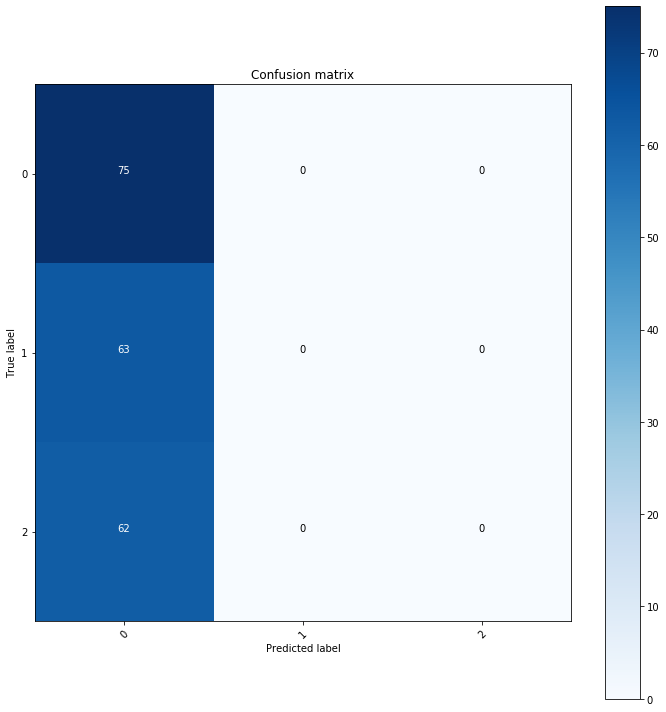

In [13]:
pred = clf.predict(X_test)
gold = Y_test 
# confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix

class_names=np.array(['0','1','2'], dtype='<U10')# customizable

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    '''
    #print(cm)

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


# Compute confusion matrix
cnf_matrix = confusion_matrix(gold, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names)


